# Breast cancer - Numpy
In this notebook, we will build a logistic model for the multivariant using numpy.

In [18]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()

X = data.data
y = data.target.reshape(-1, 1)

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

# Basic Sanity check

In [5]:
print(df.shape)
print(df.isnull().sum().sum())
print(df['target'].value_counts())

(569, 31)
0
target
1    357
0    212
Name: count, dtype: int64


# Train test split

In [6]:
np.random.seed(42)

indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx  = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Feature scaling

In [8]:
X_mean = X_train.mean(axis=0)
X_std  = X_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_test  = (X_test  - X_mean) / X_std

# Model Building

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
# Binary cross Entropy
def binary_cross_entropy(y, y_pred):
    eps = 1e-9
    return -np.mean(
        y * np.log(y_pred + eps) +
        (1 - y) * np.log(1 - y_pred + eps)
    )

In [14]:
n_samples, n_features = X_train.shape
weights = np.zeros((n_features, 1))

In [16]:
# Gradient Descent
lr = 0.01
epochs = 3000
losses = []

for epoch in range(epochs):
    z = X_train @ weights
    y_pred = sigmoid(z)

    error = y_pred - y_train
    grad = (1 / n_samples) * (X_train.T @ error)

    weights -= lr * grad

    loss = binary_cross_entropy(y_train, y_pred)
    losses.append(loss)

    if epoch % 300 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.6931
Epoch 300, Loss: 0.1573
Epoch 600, Loss: 0.1189
Epoch 900, Loss: 0.1022
Epoch 1200, Loss: 0.0924
Epoch 1500, Loss: 0.0858
Epoch 1800, Loss: 0.0809
Epoch 2100, Loss: 0.0772
Epoch 2400, Loss: 0.0742
Epoch 2700, Loss: 0.0718


# Plot Learning curve

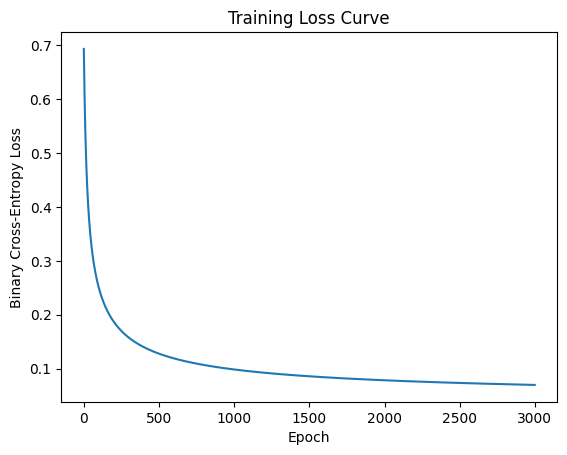

In [19]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.show()

# Make Prediction

In [20]:
def predict(X, weights, threshold=0.5):
    probs = sigmoid(X @ weights)
    return (probs >= threshold).astype(int), probs

In [21]:
y_pred_test, probs_test = predict(X_test, weights)

# Evaluate

In [22]:
accuracy = np.mean(y_pred_test == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


In [23]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, probs_test)
print("ROC–AUC:", auc)

ROC–AUC: 0.992378532867577
